In [1]:
#Imports
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#loading the dataset and getting features
Fraud_df = pd.read_csv("AIMLDataset.csv")

feature_names = Fraud_df.columns

print(feature_names)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [ ]:
# Count of fraudulent and non-fraudulent transactions
fraud_count = Fraud_df[Fraud_df['isFraud'] == 1].shape[0]
non_fraud_count = Fraud_df[Fraud_df['isFraud'] == 0].shape[0]
total = Fraud_df.shape[0]

# Percentage of fraudulent transactions
fraud_percentage = (fraud_count / total) * 100

print(f"Number of fraudulent transactions: {fraud_count}")
print(f"Number of non-fraudulent transactions: {non_fraud_count}")
print(f"Percentage of transactions that are fraudulent: {fraud_percentage:.4f}%")


Number of fraudulent transactions: 8213
Number of non-fraudulent transactions: 6354407
Percentage of transactions that are fraudulent: 0.1291%


Number of fraudulent transactions by type:

CASH_OUT: 4116
TRANSFER: 4097


/var/folders/yc/5rwhttcd67gfbl6z5x95zvdc0000gp/T/ipykernel_57170/1262914459.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_type.index, y=fraud_rate_by_type.values, palette='viridis')


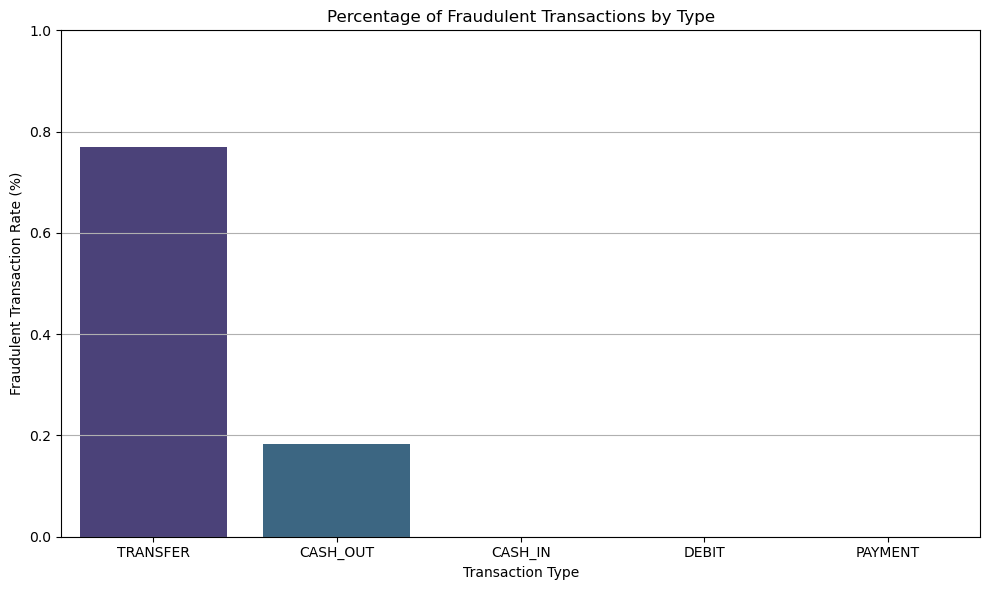

In [ ]:
# Calculate fraud rate per transaction type
fraud_rate_by_type = Fraud_df.groupby('type')['isFraud'].mean().sort_values(ascending=False) * 100

# Calculate and print number of fraudulent transactions per type
fraud_count_by_type = Fraud_df[Fraud_df['isFraud'] == 1]['type'].value_counts()
print("Number of fraudulent transactions by type:\n")
for t_type, count in fraud_count_by_type.items():
    print(f"{t_type}: {count}")

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_rate_by_type.index, y=fraud_rate_by_type.values, palette='viridis')
plt.title('Percentage of Fraudulent Transactions by Type')
plt.ylabel('Fraudulent Transaction Rate (%)')
plt.xlabel('Transaction Type')
plt.grid(axis='y')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


/var/folders/yc/5rwhttcd67gfbl6z5x95zvdc0000gp/T/ipykernel_57170/2708211944.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=non_fraudulent, x='type', ax=axes[0], palette='Blues')
/var/folders/yc/5rwhttcd67gfbl6z5x95zvdc0000gp/T/ipykernel_57170/2708211944.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraudulent, x='type', ax=axes[1], palette='Reds')


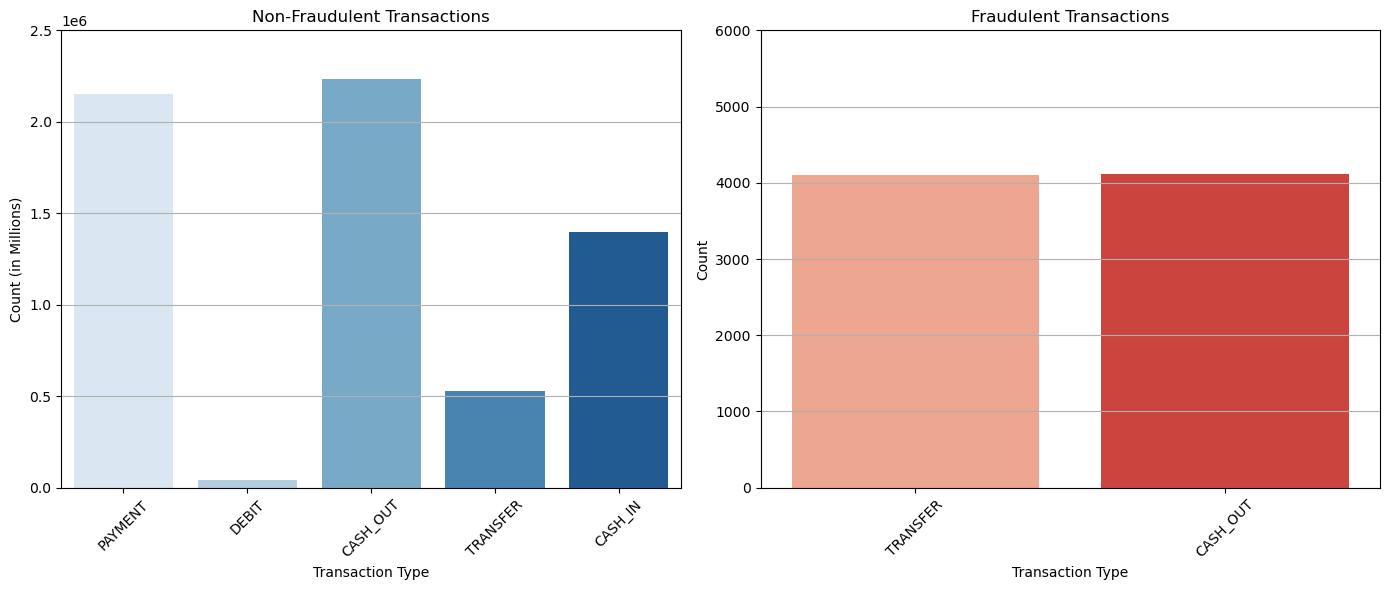

In [ ]:

fraudulent = Fraud_df[Fraud_df['isFraud'] == 1]
non_fraudulent = Fraud_df[Fraud_df['isFraud'] == 0]


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Non-Fraudulent Transactions
sns.countplot(data=non_fraudulent, x='type', ax=axes[0], palette='Blues')
axes[0].set_title('Non-Fraudulent Transactions')
axes[0].set_xlabel('Transaction Type')
axes[0].set_ylabel('Count (in Millions)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

# Fraudulent Transactions
sns.countplot(data=fraudulent, x='type', ax=axes[1], palette='Reds')
axes[1].set_title('Fraudulent Transactions')
axes[1].set_xlabel('Transaction Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')


axes[1].set_ylim(0, 6000) 
axes[0].set_ylim(0, 2.5 * 10**6)  

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Dropping features that aren't very useful to the models
Fraud_df_clean = Fraud_df.drop(['nameOrig', 'nameDest'], axis=1)

#Encoding to type so that it can be used better by the models
Fraud_df_clean['type'] = LabelEncoder().fit_transform(Fraud_df_clean['type'])

#Defining features and target
X = Fraud_df_clean.drop(['isFraud'], axis=1)
y = Fraud_df_clean['isFraud']

#Scaling features primarily for kNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Confusion Matrix (rows = actual, columns = predicted):
[[1270827      54]
 [    575    1068]]


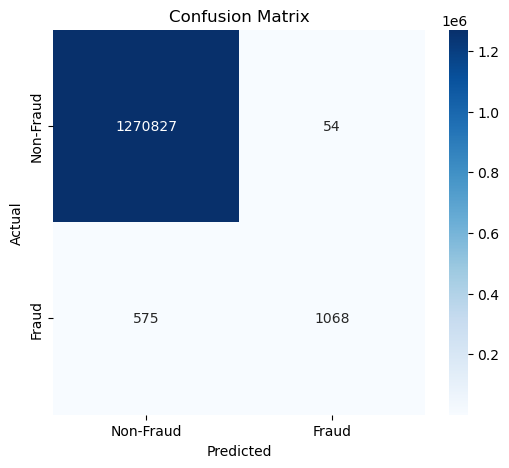

Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.95      0.65      0.77      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.82      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

#kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix (rows = actual, columns = predicted):")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9696

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270881
           1       0.04      0.90      0.07      1643

    accuracy                           0.97   1272524
   macro avg       0.52      0.93      0.53   1272524
weighted avg       1.00      0.97      0.98   1272524

Confusion Matrix (rows = actual, columns = predicted):
[[1232354   38527]
 [    169    1474]]


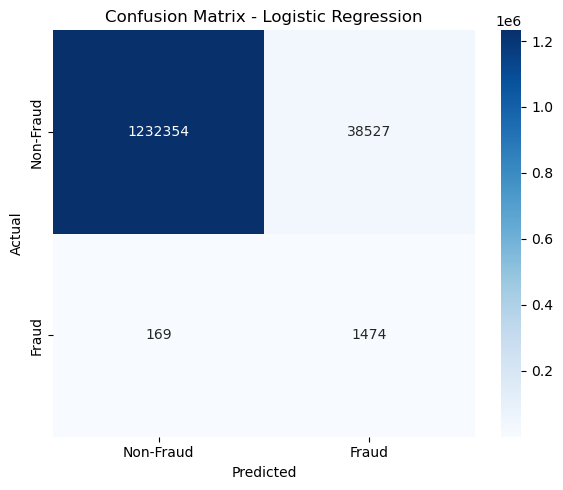

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#Logistic regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

# =Accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy:.4f}")

#Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

print("Confusion Matrix (rows = actual, columns = predicted):")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])

plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
